In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [45]:
tokenizer = Tokenizer()
data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# def read_shakespeare():
#     with open("./macbeth_clean.txt", "r") as f:
#         mb = "".join(f.readlines())
#     return mb
#
# data = read_shakespeare()

data = open("./poetry.txt").read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1  # + 1 for OOV
total_words

2690

In [46]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequences = token_list[:i + 1]
        input_sequences.append(n_gram_sequences)

input_sequences[:10]

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361]]

In [47]:
max_sequence_length = len(max(input_sequences, key=len))
max_sequence_length

16

In [48]:
# pad the sequences so that they all have the same length

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_length, padding="pre"))

# now everything up to the very last input is our "x" and the last is our label "y"

In [49]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
# we need to one hot encode our labels since this really is a classification problem
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [50]:
# print(tokenizer.word_index['in'])
# print(tokenizer.word_index['the'])
# print(tokenizer.word_index['town'])
# print(tokenizer.word_index['of'])
# print(tokenizer.word_index['athy'])
# print(tokenizer.word_index['one'])
# print(tokenizer.word_index['jeremy'])
# print(tokenizer.word_index['lanigan'])

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_length-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(total_words, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 15, 100)           269000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_8 (Dense)              (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(X, y, epochs=100)

Epoch 1/100
377/377 [==============================] - 16s 38ms/step - loss: 6.6430 - accuracy: 0.0725
Epoch 2/100
377/377 [==============================] - 13s 36ms/step - loss: 5.6866 - accuracy: 0.1172
Epoch 3/100
377/377 [==============================] - 17s 44ms/step - loss: 4.7867 - accuracy: 0.1713
Epoch 4/100
377/377 [==============================] - 17s 44ms/step - loss: 3.8462 - accuracy: 0.2456
Epoch 5/100
377/377 [==============================] - 17s 45ms/step - loss: 3.0382 - accuracy: 0.3502
Epoch 6/100
377/377 [==============================] - 17s 44ms/step - loss: 2.3376 - accuracy: 0.4654
Epoch 7/100
377/377 [==============================] - 18s 47ms/step - loss: 1.8707 - accuracy: 0.5669
Epoch 8/100
377/377 [==============================] - 17s 45ms/step - loss: 1.5216 - accuracy: 0.6409
Epoch 9/100
377/377 [==============================] - 16s 42ms/step - loss: 1.2955 - accuracy: 0.6884
Epoch 10/100
377/377 [==============================] - 16s 43ms/step - l

In [27]:
# model.save("shakespeare_macbeth.h5")

In [39]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

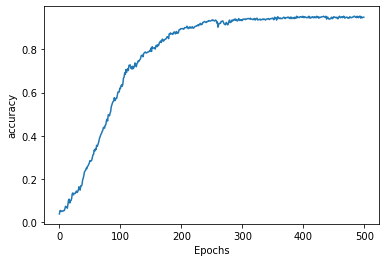

In [40]:
plot_graphs(history, 'accuracy')

In [41]:
seed_text = "laurence went to dublin"
next_words = 50

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

laurence went to dublin doing all they as red water water long a hoops youd think the wall wall might might reel and taras old hall youd youd think the wall ask youd think mad got a pound pound call call old ask jig call kerrigan long weeks at ground ground ground couples and


In [ ]:
# the output is strange, but remember that the corpus here is a single song - gibberish is to be expected.